In [1]:
import pandas as pd
import numpy as np

In [2]:
density_df = pd.read_csv("../../Resources/Neighborhood_Race_Density.csv")
household_df = pd.read_csv("../../Resources/Neighborhood_Household_Data.csv")

In [3]:
d_df = density_df[["Area", "Total Population", 
                 'Occupied Housing Units',  
                 'Percent Owner Occupied Housing Units',
                 'Gross Population Density, Persons Per Acre',
                 'Density Ranking',
                 'ACRES']]
d_df2 = d_df[d_df["Gross Population Density, Persons Per Acre"] != 0]
new_df = d_df2[d_df2["Area"] != "UT"]
density_final = new_df.rename(columns={"Occupied Housing Units" : "Total Households"})
density_final


,Area,Total Population,Total Households,Percent Owner Occupied Housing Units,"Gross Population Density, Persons Per Acre",Density Ranking,ACRES
0,ALLENDALE,"6,643","3,263",64.10%,5.1,60,"1,303.50"
1,ANDERSON MILL,"28,473","10,904",67.30%,5.0,62,"5,706.40"
2,AVERY RANCH--LAKELINE,"14,785","5,681",60.50%,3.2,74,"4,641.40"
3,BARTON CREEK MALL,"5,147","2,076",63.70%,2.2,84,"2,318.10"
4,BARTON HILLS,"8,022","4,614",31.40%,3.9,70,"2,038.10"
...,...,...,...,...,...,...,...
98,WINDSOR HILLS,"7,089","2,275",51.60%,9.0,16,790.5
99,WINDSOR PARK,"15,086","5,599",40.10%,9.8,13,"1,532.30"
100,WINDSOR ROAD,"2,985","1,225",77.80%,5.5,55,545.6
101,WOOTEN,"5,339","2,027",43.60%,8.6,22,621


In [4]:
h_df = household_df.loc[:,'Neighborhood Reporting Area': '% Single Mother Households']
h_df.dropna(thresh=2,inplace=True)
new_h_df = h_df[["Neighborhood Reporting Area",
                 "Total Population",
                 "Total Households",
                 "Household Size", 
                 "Family Households",
                 "Non-Family Households",
                 "% Families w/ Children",
                 "% Single Mother Households"]]
household_final = new_h_df.rename(columns={"Neighborhood Reporting Area":"Area"})
household_final

,Area,Total Population,Total Households,Household Size,Family Households,Non-Family Households,% Families w/ Children,% Single Mother Households
0,ALLENDALE,"6,643","3,263",2.0,"1,650","1,613",22.2%,3.3%
1,ANDERSON MILL,"28,473","10,904",2.6,"7,812","3,092",37.0%,5.4%
2,AVERY RANCH--LAKELINE,"14,785","5,681",2.6,"3,878","1,803",43.5%,5.2%
3,BARTON CREEK MALL,"5,147","2,076",2.5,"1,359",717,34.6%,4.5%
4,BARTON HILLS,"8,022","4,614",1.7,"1,445","3,169",12.1%,2.6%
...,...,...,...,...,...,...,...,...
94,WINDSOR HILLS,"7,089","2,275",3.0,"1,488",787,33.7%,8.0%
95,WINDSOR PARK,"15,086","5,599",2.7,"3,167","2,432",28.7%,9.2%
96,WINDSOR ROAD,"2,985","1,225",2.4,769,456,35.3%,3.8%
97,WOOTEN,"5,339","2,027",2.6,"1,197",830,29.7%,7.7%


In [5]:
merge_df = pd.merge(density_final, household_final, on=['Area', 'Total Population', 'Total Households'], how='outer')
merge_df.dropna(inplace=True)
merge_df["Total Population"] = merge_df["Total Population"].str.replace(",","").astype('int')
merge_df["Total Households"] = merge_df["Total Households"].str.replace(",","").astype('int')
merge_df["ACRES"] = merge_df["ACRES"].str.replace(",","").astype('float')
merge_df["Family Households"] = merge_df["Family Households"].str.replace(",","").astype('int')
merge_df["Non-Family Households"] = merge_df["Non-Family Households"].str.replace(",","").astype('int')
merge_df["Percent Owner Occupied Housing Units"] = merge_df["Percent Owner Occupied Housing Units"].str.replace("%","").astype('float')/100.0
merge_df["% Families w/ Children"] = merge_df["% Families w/ Children"].str.replace("%","").astype('float')/100.0
merge_df["% Single Mother Households"] = merge_df["% Single Mother Households"].str.replace("%","").astype('float')/100.0
merge_df

,Area,Total Population,Total Households,Percent Owner Occupied Housing Units,"Gross Population Density, Persons Per Acre",Density Ranking,ACRES,Household Size,Family Households,Non-Family Households,% Families w/ Children,% Single Mother Households
0,ALLENDALE,6643,3263,0.641,5.1,60.0,1303.5,2.0,1650,1613,0.222,0.033
1,ANDERSON MILL,28473,10904,0.673,5.0,62.0,5706.4,2.6,7812,3092,0.370,0.054
2,AVERY RANCH--LAKELINE,14785,5681,0.605,3.2,74.0,4641.4,2.6,3878,1803,0.435,0.052
3,BARTON CREEK MALL,5147,2076,0.637,2.2,84.0,2318.1,2.5,1359,717,0.346,0.045
4,BARTON HILLS,8022,4614,0.314,3.9,70.0,2038.1,1.7,1445,3169,0.121,0.026
...,...,...,...,...,...,...,...,...,...,...,...,...
93,WINDSOR HILLS,7089,2275,0.516,9.0,16.0,790.5,3.0,1488,787,0.337,0.080
94,WINDSOR PARK,15086,5599,0.401,9.8,13.0,1532.3,2.7,3167,2432,0.287,0.092
95,WINDSOR ROAD,2985,1225,0.778,5.5,55.0,545.6,2.4,769,456,0.353,0.038
96,WOOTEN,5339,2027,0.436,8.6,22.0,621.0,2.6,1197,830,0.297,0.077


In [6]:
len(merge_df)

98

In [7]:
#City of Austin Averages for colummns
density_avg = merge_df["Gross Population Density, Persons Per Acre"].mean()
owner_occupied = merge_df["Percent Owner Occupied Housing Units"].mean()
house_size = merge_df["Household Size"].mean()
fam = merge_df["Family Households"].sum()
non_fam = merge_df["Non-Family Households"].sum()
percent_fam = fam / (fam+non_fam)
children = merge_df["% Families w/ Children"].mean()
mother = merge_df["% Single Mother Households"].mean()

stats = ["Austin", density_avg, owner_occupied, house_size, percent_fam, children, mother]


In [8]:
#Downtown Averages
zip_78701 = merge_df[merge_df["Area"] == "DOWNTOWN"]
density_78701 = zip_78701["Gross Population Density, Persons Per Acre"].mean()
owner_78701 = zip_78701["Percent Owner Occupied Housing Units"].mean()
house_78701 = zip_78701["Household Size"].mean()
fam_78701 = zip_78701["Family Households"].sum()
non_fam_78701 = zip_78701["Non-Family Households"].sum()
percent_fam_78701 = fam_78701 / (fam_78701+non_fam_78701)
children_78701 = zip_78701["% Families w/ Children"].mean()
mother_78701 = zip_78701["% Single Mother Households"].mean()

stats_78701 = ["78701", density_78701, owner_78701, house_78701, percent_fam_78701, children_78701, mother_78701]

zip_78701

,Area,Total Population,Total Households,Percent Owner Occupied Housing Units,"Gross Population Density, Persons Per Acre",Density Ranking,ACRES,Household Size,Family Households,Non-Family Households,% Families w/ Children,% Single Mother Households
22,DOWNTOWN,7635,4379,0.333,6.8,44.0,1117.2,1.5,908,3471,0.036,0.009


In [9]:
zip_78741 = merge_df[(merge_df["Area"] == "RIVERSIDE")|
               (merge_df["Area"] == "MONTOPOLIS")|
               (merge_df["Area"] == "PARKER LANE")|
               (merge_df["Area"] == "PLEASANT VALLEY")]


density_78741 = zip_78741["Gross Population Density, Persons Per Acre"].mean()
owner_78741 = zip_78741["Percent Owner Occupied Housing Units"].mean()
house_78741 = zip_78741["Household Size"].mean()
fam_78741 = zip_78741["Family Households"].sum()
non_fam_78741 = zip_78741["Non-Family Households"].sum()
percent_fam_78741 = fam_78741 / (fam_78741+non_fam_78741)
children_78741 = zip_78741["% Families w/ Children"].mean()
mother_78741 = zip_78741["% Single Mother Households"].mean()

stats_78741 = ["78741", density_78741, owner_78741, house_78741, percent_fam_78741, children_78741, mother_78741]


zip_78741

,Area,Total Population,Total Households,Percent Owner Occupied Housing Units,"Gross Population Density, Persons Per Acre",Density Ranking,ACRES,Household Size,Family Households,Non-Family Households,% Families w/ Children,% Single Mother Households
50,MONTOPOLIS,10638,3152,0.468,7.4,35.0,1446.3,3.3,2312,840,0.409,0.175
62,PARKER LANE,9581,4396,0.160,8.4,24.0,1133.9,2.2,1751,2645,0.216,0.086
64,PLEASANT VALLEY,12618,5163,0.050,8.8,18.0,1438.2,2.4,1302,3861,0.136,0.057
66,RIVERSIDE,12012,4961,0.091,16.7,3.0,719.8,2.4,2169,2792,0.262,0.101


In [10]:
zip_78704 = merge_df[(merge_df["Area"] == "BOULDIN")|
               (merge_df["Area"] == "BARTON HILLS")|
               (merge_df["Area"] == "DAWSON")|
               (merge_df["Area"] == "GALINDO")|
               (merge_df["Area"] == "SOUTH LAMAR")|
               (merge_df["Area"] == "ST. EDWARDS")|
               (merge_df["Area"] == "SOUTH RIVER CITY")|
               (merge_df["Area"] == "ZILKER")
              ]

density_78704 = zip_78704["Gross Population Density, Persons Per Acre"].mean()
owner_78704 = zip_78704["Percent Owner Occupied Housing Units"].mean()
house_78704 = zip_78704["Household Size"].mean()
fam_78704 = zip_78704["Family Households"].sum()
non_fam_78704 = zip_78704["Non-Family Households"].sum()
percent_fam_78704 = fam_78704 / (fam_78704+non_fam_78704)
children_78704 = zip_78704["% Families w/ Children"].sum()
mother_78704 = zip_78704["% Single Mother Households"].sum()

stats_78704 = ["78704", density_78704, owner_78704, house_78704, percent_fam_78704, children_78704, mother_78704]


zip_78704

,Area,Total Population,Total Households,Percent Owner Occupied Housing Units,"Gross Population Density, Persons Per Acre",Density Ranking,ACRES,Household Size,Family Households,Non-Family Households,% Families w/ Children,% Single Mother Households
4,BARTON HILLS,8022,4614,0.314,3.9,70.0,2038.1,1.7,1445,3169,0.121,0.026
6,BOULDIN,5510,2694,0.404,7.1,38.0,773.3,2.0,1024,1670,0.182,0.084
18,DAWSON,2670,1273,0.372,8.5,23.0,315.2,2.1,491,782,0.145,0.034
28,GALINDO,3512,1745,0.338,8.1,26.0,433.5,2.0,640,1105,0.157,0.054
74,SOUTH LAMAR,8152,4264,0.187,10.5,10.0,777.7,1.9,1307,2957,0.145,0.051
76,SOUTH RIVER CITY,6511,3559,0.346,8.9,17.0,733.2,1.8,1090,2469,0.137,0.053
79,ST. EDWARDS,5322,2045,0.118,7.4,33.0,719.6,2.0,660,1385,0.158,0.054
97,ZILKER,5779,3174,0.476,7.7,28.0,747.0,1.8,1155,2019,0.161,0.045


In [11]:
zip_78753 = merge_df[(merge_df["Area"] == "NORTH LAMAR")|
               (merge_df["Area"] == "WINDSOR HILLS")|
               (merge_df["Area"] == "HERITAGE HILLS")|
               (merge_df["Area"] == "GEORGIA ACRES")]

density_78753 = zip_78753["Gross Population Density, Persons Per Acre"].mean()
owner_78753 = zip_78753["Percent Owner Occupied Housing Units"].mean()
house_78753 = zip_78753["Household Size"].mean()
fam_78753 = zip_78753["Family Households"].sum()
non_fam_78753 = zip_78753["Non-Family Households"].sum()
percent_fam_78753 = fam_78753 / (fam_78753+non_fam_78753)
children_78753 = zip_78753["% Families w/ Children"].mean()
mother_78753 = zip_78753["% Single Mother Households"].mean()

stats_78753 = ["78753", density_78753, owner_78753, house_78753, percent_fam_78753, children_78753, mother_78753]

zip_78753

,Area,Total Population,Total Households,Percent Owner Occupied Housing Units,"Gross Population Density, Persons Per Acre",Density Ranking,ACRES,Household Size,Family Households,Non-Family Households,% Families w/ Children,% Single Mother Households
31,GEORGIA ACRES,8559,3128,0.148,12.7,7.0,676.2,2.7,1783,1345,0.355,0.110
36,HERITAGE HILLS,5853,1938,0.348,6.8,45.0,864.8,3.0,1280,658,0.424,0.115
54,NORTH LAMAR,6478,1948,0.267,10.3,11.0,627.8,3.3,1371,577,0.440,0.117
93,WINDSOR HILLS,7089,2275,0.516,9.0,16.0,790.5,3.0,1488,787,0.337,0.080


In [12]:
zip_78758 = merge_df[(merge_df["Area"] == "NORTH BURNET")|
               (merge_df["Area"] == "GRACY WOODS")|
               (merge_df["Area"] == "NACA")]

density_78758 = zip_78758["Gross Population Density, Persons Per Acre"].mean()
owner_78758 = zip_78758["Percent Owner Occupied Housing Units"].mean()
house_78758 = zip_78758["Household Size"].mean()
fam_78758 = zip_78758["Family Households"].sum()
non_fam_78758 = zip_78758["Non-Family Households"].sum()
percent_fam_78758 = fam_78758 / (fam_78758+non_fam_78758)
children_78758 = zip_78758["% Families w/ Children"].mean()
mother_78758 = zip_78758["% Single Mother Households"].mean()

stats_78758 = ["78758", density_78758, owner_78758, house_78758, percent_fam_78758, children_78758, mother_78758]

zip_78758

,Area,Total Population,Total Households,Percent Owner Occupied Housing Units,"Gross Population Density, Persons Per Acre",Density Ranking,ACRES,Household Size,Family Households,Non-Family Households,% Families w/ Children,% Single Mother Households
33,GRACY WOODS,28220,12659,0.442,6.4,47.0,4412.6,2.2,6564,6095,0.235,0.063
52,NACA,28604,9578,0.293,14.6,5.0,1953.7,3.0,6213,3365,0.379,0.111
53,NORTH BURNET,4472,2554,0.012,2.1,85.0,2088.1,1.8,777,1777,0.143,0.044


In [13]:
summary_df = pd.DataFrame(np.array([stats, stats_78701, stats_78741, stats_78704, stats_78753, stats_78758]),
                          columns=['Area', "Gross Population Density, Persons Per Acre", "Percent Owner Occupied Housing Units", "Household Size", "% Family Households", "% Families w/ Children", "% Single Mother Households"])
summary_df[["Gross Population Density, Persons Per Acre", "Percent Owner Occupied Housing Units", "Household Size", "% Family Households", "% Families w/ Children", "% Single Mother Households"]] = summary_df[["Gross Population Density, Persons Per Acre", "Percent Owner Occupied Housing Units", "Household Size", "% Family Households", "% Families w/ Children", "% Single Mother Households"]].astype(float).round(2)
summary_df


,Area,"Gross Population Density, Persons Per Acre",Percent Owner Occupied Housing Units,Household Size,% Family Households,% Families w/ Children,% Single Mother Households
0,Austin,6.31,0.46,2.40,0.52,0.26,0.07
1,78701,6.80,0.33,1.50,0.21,0.04,0.01
2,78741,10.32,0.19,2.58,0.43,0.26,0.10
3,78704,7.76,0.32,1.91,0.33,1.21,0.40
4,78753,9.70,0.32,3.00,0.64,0.39,0.11
5,78758,7.70,0.25,2.33,0.55,0.25,0.07


In [14]:

merge_df["Zip Code"] = 0

In [15]:
merge_df.iloc[90:]

,Area,Total Population,Total Households,Percent Owner Occupied Housing Units,"Gross Population Density, Persons Per Acre",Density Ranking,ACRES,Household Size,Family Households,Non-Family Households,% Families w/ Children,% Single Mother Households,Zip Code
90,WEST UNIVERSITY,16408,6104,0.081,35.0,1.0,468.7,2.0,537,5567,0.016,0.004,0
91,WESTGATE,3914,1675,0.382,7.2,36.0,540.2,2.2,835,840,0.224,0.061,0
92,WESTOVER HILLS,7626,4012,0.581,6.2,49.0,1230.6,1.9,1774,2238,0.169,0.039,0
93,WINDSOR HILLS,7089,2275,0.516,9.0,16.0,790.5,3.0,1488,787,0.337,0.080,0
94,WINDSOR PARK,15086,5599,0.401,9.8,13.0,1532.3,2.7,3167,2432,0.287,0.092,0
95,WINDSOR ROAD,2985,1225,0.778,5.5,55.0,545.6,2.4,769,456,0.353,0.038,0
96,WOOTEN,5339,2027,0.436,8.6,22.0,621.0,2.6,1197,830,0.297,0.077,0
97,ZILKER,5779,3174,0.476,7.7,28.0,747.0,1.8,1155,2019,0.161,0.045,0


In [16]:
partial_zip = [

]

In [17]:
zips = [
    78757, #0
    78750, #1
    78717, #2
    78746, #3
    78704, #4
    78744, #5
    78704, #6
    78756, #7
    78748, #8
    78731, #9
    78702, #10
    78703, #11
    78745, #12
    78702, #13
    78739, #14
    78752, #15
    78757, #16
    78746, #17
    78704, #18
    78624, #19
    78617, #20
    78745, #21
    78701, #22
    78702, #23
    78745, #24
    78735, #25
    78726, #26
    78744, #27
    78704, #28
    78745, #29
    78759, #30
    78753, #31
    78702, #32
    78758, #33
    78751, #34
    78739, #35
    78753, #36
    78752, #37
    78731, #38
    78702, #39
    78751, #40
    78705, #41
    78721, #42
    78759, #43
    78724, #44
    78730, #45
    78744, #46
    78727, #47
    78721, #48
    78721, #49
    78741, #50
    78723, #51
    78758, #52
    78758, #53
    78753, #54
    78751, #55
    78757, #56
    78705, #57
    78731, #58
    78703, #59
    78703, #60
    78747, #61
    78741, #62
    78723, #63
    78741, #64
    78729, #65
    78724, #66
    78717, #67
    78729, #68
    78756, #69
    78702, #70
    78754, #71
    78737, #72
    78748, #73
    78704, #74
    78704, #75
    78704, #76
    78744, #77
    78750, #78
    78704, #79
    78752, #80
    78745, #81
    78753, #82
    78756, #83
    78723, #84
    78744, #85
    78749, #86
    78754, #87
    78745, #88
    78735, #89
    78705, #90
    78745, #91
    78745, #92
    78753, #93
    78723, #94
    78703, #95
    78758, #96
    78704, #97
]

In [18]:
zips

[78757,
 78750,
 78717,
 78746,
 78704,
 78744,
 78704,
 78756,
 78748,
 78731,
 78702,
 78703,
 78745,
 78702,
 78739,
 78752,
 78757,
 78746,
 78704,
 78624,
 78617,
 78745,
 78701,
 78702,
 78745,
 78735,
 78726,
 78744,
 78704,
 78745,
 78759,
 78753,
 78702,
 78758,
 78751,
 78739,
 78753,
 78752,
 78731,
 78702,
 78751,
 78705,
 78721,
 78759,
 78724,
 78730,
 78744,
 78727,
 78721,
 78721,
 78741,
 78723,
 78758,
 78758,
 78753,
 78751,
 78757,
 78705,
 78731,
 78703,
 78703,
 78747,
 78741,
 78723,
 78741,
 78729,
 78724,
 78717,
 78729,
 78756,
 78702,
 78754,
 78737,
 78748,
 78704,
 78704,
 78704,
 78744,
 78750,
 78704,
 78752,
 78745,
 78753,
 78756,
 78723,
 78744,
 78749,
 78754,
 78745,
 78735,
 78705,
 78745,
 78745,
 78753,
 78723,
 78703,
 78758,
 78704]

In [19]:
merge_df["Zip Code"] = zips

In [20]:
merge_df

,Area,Total Population,Total Households,Percent Owner Occupied Housing Units,"Gross Population Density, Persons Per Acre",Density Ranking,ACRES,Household Size,Family Households,Non-Family Households,% Families w/ Children,% Single Mother Households,Zip Code
0,ALLENDALE,6643,3263,0.641,5.1,60.0,1303.5,2.0,1650,1613,0.222,0.033,78757
1,ANDERSON MILL,28473,10904,0.673,5.0,62.0,5706.4,2.6,7812,3092,0.370,0.054,78750
2,AVERY RANCH--LAKELINE,14785,5681,0.605,3.2,74.0,4641.4,2.6,3878,1803,0.435,0.052,78717
3,BARTON CREEK MALL,5147,2076,0.637,2.2,84.0,2318.1,2.5,1359,717,0.346,0.045,78746
4,BARTON HILLS,8022,4614,0.314,3.9,70.0,2038.1,1.7,1445,3169,0.121,0.026,78704
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,WINDSOR HILLS,7089,2275,0.516,9.0,16.0,790.5,3.0,1488,787,0.337,0.080,78753
94,WINDSOR PARK,15086,5599,0.401,9.8,13.0,1532.3,2.7,3167,2432,0.287,0.092,78723
95,WINDSOR ROAD,2985,1225,0.778,5.5,55.0,545.6,2.4,769,456,0.353,0.038,78703
96,WOOTEN,5339,2027,0.436,8.6,22.0,621.0,2.6,1197,830,0.297,0.077,78758


In [21]:
merge_df[merge_df["Zip Code"].isna()]

,Area,Total Population,Total Households,Percent Owner Occupied Housing Units,"Gross Population Density, Persons Per Acre",Density Ranking,ACRES,Household Size,Family Households,Non-Family Households,% Families w/ Children,% Single Mother Households,Zip Code


In [22]:
zip_groupby = merge_df.groupby("Zip Code")

In [23]:
pop_dens = "Gross Population Density, Persons Per Acre"

In [24]:
zip_groupby[pop_dens].mean()

Zip Code
78617     1.700000
78624     1.000000
78701     6.800000
78702     7.450000
78703     5.800000
78704     7.700000
78705    18.866667
78717     1.650000
78721     3.766667
78723     5.975000
78724     9.150000
78726     1.300000
78727     5.400000
78729     5.250000
78730     0.900000
78731     4.400000
78735     2.450000
78737     4.300000
78739     2.750000
78741     8.200000
78744     5.200000
78745     6.987500
78746     1.700000
78747     2.800000
78748     4.850000
78749     5.700000
78750     2.800000
78751     9.833333
78752     8.933333
78753     8.480000
78754     2.000000
78756     6.600000
78757     5.466667
78758     7.925000
78759     3.750000
Name: Gross Population Density, Persons Per Acre, dtype: float64

In [25]:
merge_df[merge_df["Zip Code"]==78705]

,Area,Total Population,Total Households,Percent Owner Occupied Housing Units,"Gross Population Density, Persons Per Acre",Density Ranking,ACRES,Household Size,Family Households,Non-Family Households,% Families w/ Children,% Single Mother Households,Zip Code
41,JESTER,4974,2329,0.575,1.3,92.0,3795.1,2.1,1298,1031,0.246,0.035,78705
57,NORTH UNIVERSITY,4791,2484,0.130,20.3,2.0,235.9,1.7,326,2158,0.037,0.004,78705
90,WEST UNIVERSITY,16408,6104,0.081,35.0,1.0,468.7,2.0,537,5567,0.016,0.004,78705


In [26]:
zips_sorted = [0,
 78610,
 78612,
 78613,
 78617,
 78626,
 78640,
 78641,
 78645,
 78652,
 78653,
 78660,
 78664,
 78669,
 78681,
 78701,
 78702,
 78703,
 78704,
 78705,
 78712,
 78717,
 78719,
 78721,
 78722,
 78723,
 78724,
 78725,
 78726,
 78727,
 78728,
 78729,
 78730,
 78731,
 78732,
 78733,
 78734,
 78735,
 78736,
 78737,
 78738,
 78739,
 78741,
 78742,
 78744,
 78745,
 78746,
 78747,
 78748,
 78749,
 78750,
 78751,
 78752,
 78753,
 78754,
 78756,
 78757,
 78758,
 78759]

In [27]:
crimes_by_zip_sorted = [715,
 23,
 1,
 1726,
 3398,
 1,
 3,
 7,
 1,
 188,
 393,
 1408,
 37,
 1,
 31,
 59865,
 30756,
 9969,
 39279,
 13889,
 121,
 2574,
 5362,
 8182,
 3428,
 22050,
 7186,
 694,
 2272,
 6740,
 265,
 8076,
 585,
 4959,
 67,
 69,
 27,
 2813,
 857,
 48,
 16,
 1257,
 44548,
 537,
 23437,
 29092,
 5405,
 2778,
 21119,
 7942,
 4963,
 11805,
 14213,
 42006,
 4480,
 2998,
 10071,
 34576,
 14283]

In [28]:
crimes_by_zip = { "Zip Code": zips_sorted, "Crime Reports":crimes_by_zip_sorted }

In [29]:
crimes_by_zip_df = pd.DataFrame( crimes_by_zip)

In [30]:
zip_data_df = pd.merge(merge_df, crimes_by_zip_df, on="Zip Code", how="left")

In [31]:
zip_data_df

,Area,Total Population,Total Households,Percent Owner Occupied Housing Units,"Gross Population Density, Persons Per Acre",Density Ranking,ACRES,Household Size,Family Households,Non-Family Households,% Families w/ Children,% Single Mother Households,Zip Code,Crime Reports
0,ALLENDALE,6643,3263,0.641,5.1,60.0,1303.5,2.0,1650,1613,0.222,0.033,78757,10071.0
1,ANDERSON MILL,28473,10904,0.673,5.0,62.0,5706.4,2.6,7812,3092,0.370,0.054,78750,4963.0
2,AVERY RANCH--LAKELINE,14785,5681,0.605,3.2,74.0,4641.4,2.6,3878,1803,0.435,0.052,78717,2574.0
3,BARTON CREEK MALL,5147,2076,0.637,2.2,84.0,2318.1,2.5,1359,717,0.346,0.045,78746,5405.0
4,BARTON HILLS,8022,4614,0.314,3.9,70.0,2038.1,1.7,1445,3169,0.121,0.026,78704,39279.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,WINDSOR HILLS,7089,2275,0.516,9.0,16.0,790.5,3.0,1488,787,0.337,0.080,78753,42006.0
94,WINDSOR PARK,15086,5599,0.401,9.8,13.0,1532.3,2.7,3167,2432,0.287,0.092,78723,22050.0
95,WINDSOR ROAD,2985,1225,0.778,5.5,55.0,545.6,2.4,769,456,0.353,0.038,78703,9969.0
96,WOOTEN,5339,2027,0.436,8.6,22.0,621.0,2.6,1197,830,0.297,0.077,78758,34576.0


In [32]:
zip_df = zip_data_df[zip_data_df["Zip Code"]!=78705]

In [33]:
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

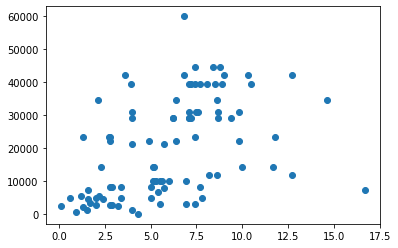

In [34]:
plt.scatter(zip_df[pop_dens],zip_df["Crime Reports"])

In [35]:
zip_df = zip_df.fillna({"Crime Reports":0})

In [36]:
percent_owned = "Percent Owner Occupied Housing Units"

In [37]:
zip_df

,Area,Total Population,Total Households,Percent Owner Occupied Housing Units,"Gross Population Density, Persons Per Acre",Density Ranking,ACRES,Household Size,Family Households,Non-Family Households,% Families w/ Children,% Single Mother Households,Zip Code,Crime Reports
0,ALLENDALE,6643,3263,0.641,5.1,60.0,1303.5,2.0,1650,1613,0.222,0.033,78757,10071.0
1,ANDERSON MILL,28473,10904,0.673,5.0,62.0,5706.4,2.6,7812,3092,0.370,0.054,78750,4963.0
2,AVERY RANCH--LAKELINE,14785,5681,0.605,3.2,74.0,4641.4,2.6,3878,1803,0.435,0.052,78717,2574.0
3,BARTON CREEK MALL,5147,2076,0.637,2.2,84.0,2318.1,2.5,1359,717,0.346,0.045,78746,5405.0
4,BARTON HILLS,8022,4614,0.314,3.9,70.0,2038.1,1.7,1445,3169,0.121,0.026,78704,39279.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,WINDSOR HILLS,7089,2275,0.516,9.0,16.0,790.5,3.0,1488,787,0.337,0.080,78753,42006.0
94,WINDSOR PARK,15086,5599,0.401,9.8,13.0,1532.3,2.7,3167,2432,0.287,0.092,78723,22050.0
95,WINDSOR ROAD,2985,1225,0.778,5.5,55.0,545.6,2.4,769,456,0.353,0.038,78703,9969.0
96,WOOTEN,5339,2027,0.436,8.6,22.0,621.0,2.6,1197,830,0.297,0.077,78758,34576.0


In [38]:
zip_group = zip_df.groupby("Zip Code")

In [39]:
zip_group.mean()

,Total Population,Total Households,Percent Owner Occupied Housing Units,"Gross Population Density, Persons Per Acre",Density Ranking,ACRES,Household Size,Family Households,Non-Family Households,% Families w/ Children,% Single Mother Households,Crime Reports
Zip Code,,,,,,,,,,,,
78617,7526.000000,2004.000000,0.878000,1.700000,88.000000,4415.700000,3.800000,1712.000000,292.000000,0.590000,0.137000,3398.0
78624,3520.000000,996.000000,0.478000,1.000000,96.000000,3568.600000,3.500000,735.000000,261.000000,0.468000,0.138000,0.0
78701,7635.000000,4379.000000,0.333000,6.800000,44.000000,1117.200000,1.500000,908.000000,3471.000000,0.036000,0.009000,59865.0
78702,3635.666667,1379.666667,0.470667,7.450000,33.500000,545.466667,2.516667,700.166667,679.500000,0.220000,0.099167,30756.0
78703,4725.500000,2225.500000,0.554500,5.800000,52.000000,848.225000,2.075000,1049.500000,1176.000000,0.228000,0.029250,9969.0
78704,5770.111111,2908.222222,0.347000,7.700000,31.333333,825.544444,1.955556,1034.333333,1873.888889,0.156222,0.051222,39279.0
78717,7829.000000,3080.500000,0.430500,1.650000,86.500000,6219.600000,2.200000,2034.000000,1046.500000,0.289500,0.038500,2574.0
78721,4815.333333,1623.333333,0.522667,3.766667,70.000000,1292.966667,2.966667,1027.333333,596.000000,0.307667,0.132333,8182.0
78723,6663.250000,2503.750000,0.540250,5.975000,50.000000,992.700000,2.575000,1461.000000,1042.750000,0.264500,0.090750,22050.0


In [40]:
list( zip_group[percent_owned].mean() )

[0.878,
 0.478,
 0.33299999999999996,
 0.4706666666666666,
 0.5545,
 0.347,
 0.4305,
 0.5226666666666667,
 0.54025,
 0.244,
 0.16,
 0.395,
 0.46,
 0.71,
 0.6829999999999999,
 0.5555,
 0.431,
 0.9195,
 0.226,
 0.5662,
 0.474125,
 0.687,
 0.633,
 0.688,
 0.75,
 0.8029999999999999,
 0.2603333333333333,
 0.2976666666666667,
 0.3472,
 0.3345,
 0.3426666666666666,
 0.5650000000000001,
 0.29575,
 0.2465]

In [41]:
len( list( zip_group["Crime Reports"].mean().astype('int64') ) )

34

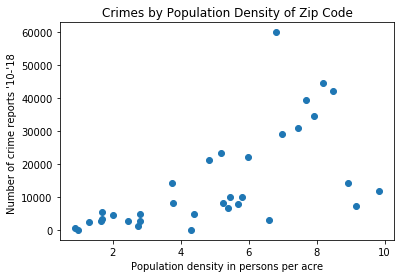

In [42]:
plt.scatter( list( zip_group[pop_dens].mean() ), list( zip_group["Crime Reports"].mean() ) )
plt.xlabel("Population density in persons per acre")
plt.ylabel("Number of crime reports '10-'18 ")
plt.title('Crimes by Population Density of Zip Code')
plt.savefig("crimeByPopDensity.png")

In [43]:
x_values = np.asarray( zip_group[pop_dens].mean().astype('int64')  )
y_values = np.asarray( zip_group["Crime Reports"].mean().astype('int64') )
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope.astype('int64') + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


In [44]:
regress_values[12260]

IndexError: index 12260 is out of bounds for axis 0 with size 34

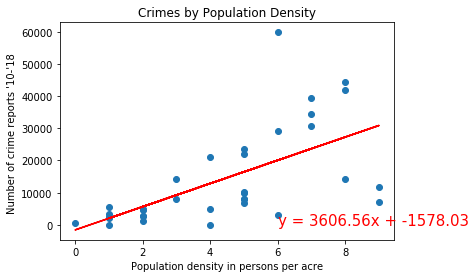

In [45]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values[0:34],"r-")
plt.xlabel("Population density in persons per acre")
plt.ylabel("Number of crime reports '10-'18 ")
plt.title('Crimes by Population Density')
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

In [46]:
type( list( zip_group[pop_dens].mean() )[0] )

float

In [47]:
type( list( zip_group["Crime Reports"].mean() )[0] )

float

In [48]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [49]:
122604/34

3606.0

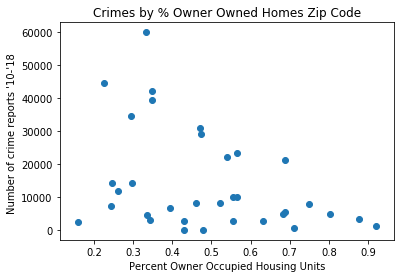

In [50]:
plt.scatter( list( zip_group[percent_owned].mean() ), list( zip_group["Crime Reports"].mean() ) )
plt.xlabel("Percent Owner Occupied Housing Units")
plt.ylabel("Number of crime reports '10-'18 ")
plt.title('Crimes by % Owner Owned Homes Zip Code')
plt.savefig("crimePercentOwnerOwnedHomes.png")

In [51]:
def regression(x, y, title, xlabel, ylabel,filename):
    x = np.asarray(x)
    y = np.asarray(y)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(0,40),fontsize=15,color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(filename)
    print(f"The r-squared is: {rvalue}")

The r-squared is: -0.37418290286524913


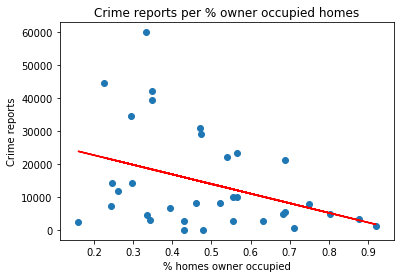

In [52]:
regression( list( zip_group[percent_owned].mean() ), list( zip_group["Crime Reports"].mean() ), 
          "Crime reports per % owner occupied homes", "% homes owner occupied", "Crime reports",
          "crimeByOwnerOccupiedPercent.png")

The r-squared is: 0.6272581627908558


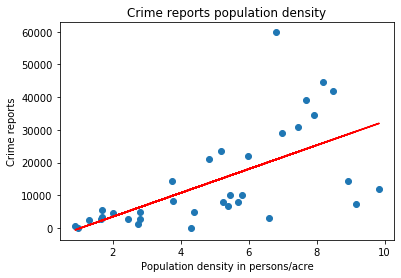

In [53]:
regression( list( zip_group[pop_dens].mean() ), list( zip_group["Crime Reports"].mean() ), 
          "Crime reports population density", "Population density in persons/acre", "Crime reports",
          "crimeByPopulationDensity.png")

In [54]:
x = [7.0, 6.6, 5.7, 5.2, 4.2, 3.4, 3.3, 3.1, 2.9]

In [55]:
y= [0.021826154490397157,
 0.019847014272679566,
 0.02181929977097397,
 0.027998727648331587,
 0.02990878399760421,
 0.03312010556818007,
 0.03517417051150837,
 0.03698349718213753,
 0.041854024941998046]

In [58]:
regression( x, y , 
          "Crime reports population density", "Population density in persons/acre", "Crime reports",
          "crimeByPopulationDensity.png")

The r-squared is: -0.9498422147426401


ValueError: Image size of 547x159453 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>